# DRAFT 2020-4-6: INITIALIZATION OF COVID-19 INVESTIGATION

In this notebook, we are going to get everything started to investigate COVID-19 data set. 

### Load Libraries and Data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
covid19_confirmed = pd.read_csv("/repos/Coronavirus/data/time_series_covid19_confirmed_global.csv")
covid19_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


### China Incidence

In [156]:
covid19_confirmed_china = covid19_confirmed.iloc[np.array(covid19_confirmed['Country/Region'] == 'China'), :]
covid19_confirmed_china

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,569,573,577,577,580,580,582,584,585,586
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,578,578,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,331,337,338,340,343,345,345,349,350,350
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,136,136,138,138,138,138,138,138,138,138
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1456,1467,1475,1484,1494,1501,1507,1514,1516,1524
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,319,319,319,321,321,323,325,326,326,327


In [124]:
BBox = (covid19_confirmed_china.Long.min(), covid19_confirmed_china.Long.max(), covid19_confirmed_china.Lat.min(), covid19_confirmed_china.Lat.max())
BBox

(85.240099999999998, 127.7615, 19.195900000000002, 47.862000000000002)

We can refer to this opensource map for data. Click [here](https://www.openstreetmap.org/export#map=5/34.144/106.479)

In [125]:
mapdta = plt.imread('/repos/Coronavirus/figures/china-70-130-19-47.PNG')

In [141]:
confirmed_case = covid19_confirmed_china['3/31/20']
confirmed_case.head()

49    990
50    580
51    579
52    343
53    138
Name: 3/31/20, dtype: int64

In [174]:
cityName = np.array(covid19_confirmed_china['Province/State'])[0]
cityName_x = np.array(covid19_confirmed_china['Long'])[0]
cityName_y = np.array(covid19_confirmed_china['Lat'])[0]
cityName, cityName_x, cityName_y

('Anhui', 117.2264, 31.825700000000001)

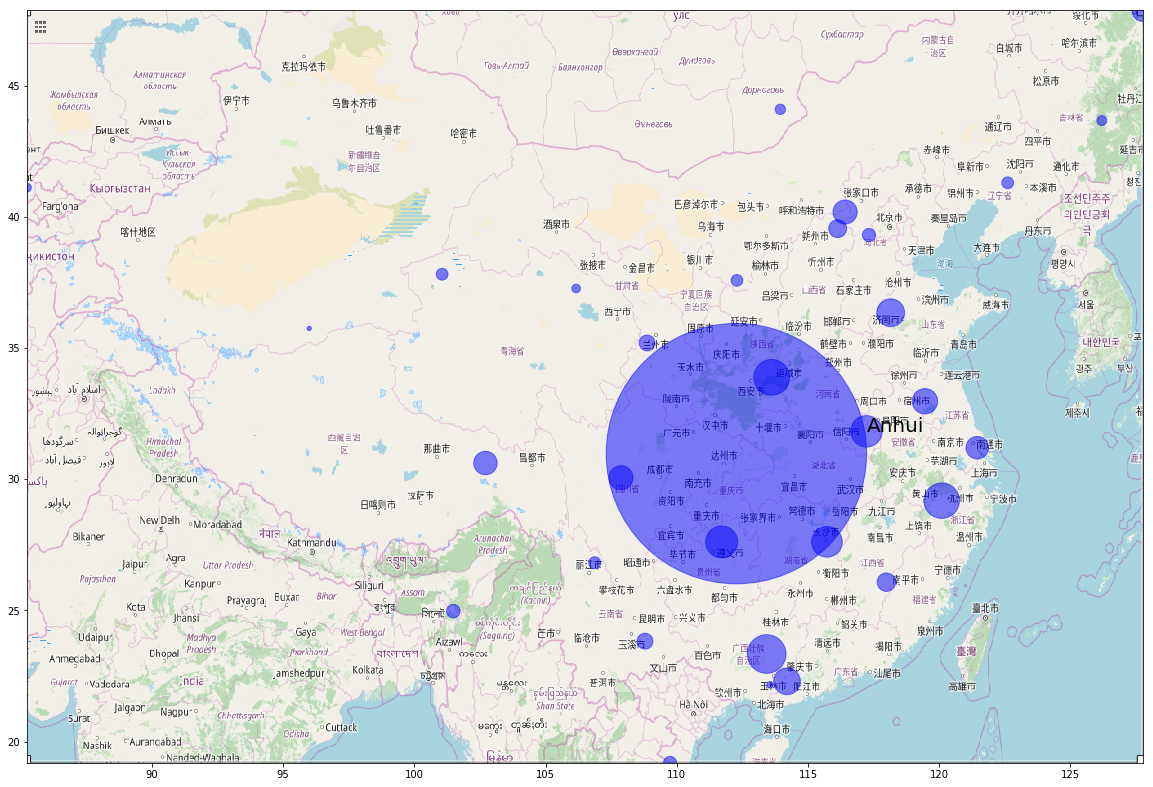

In [193]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.imshow(mapdta, zorder=0, extent = BBox, aspect= 'equal')
plt.text(cityName_x, cityName_y, cityName, fontsize=20)
ax.scatter(covid19_confirmed_china.Long, covid19_confirmed_china.Lat, zorder=1, alpha= 0.5, c='blue', s=confirmed_case)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.show()

### Quick Deployment

In [323]:
def quick_map(ENTER_A_DATE = '3/31/20', OBS = 1, CITY = 'Anhui'):
    confirmed_case = covid19_confirmed_china[ENTER_A_DATE]
    confirmed_case.head()
    
    unitData = covid19_confirmed_china.loc[np.array(covid19_confirmed_china['Province/State'] == CITY), ]
    name = np.array(covid19_confirmed_china.loc[np.array(covid19_confirmed_china['Province/State'] == CITY), ]['Province/State'].astype(str))[0]
    count = np.array(covid19_confirmed_china.loc[np.array(covid19_confirmed_china['Province/State'] == CITY), ][ENTER_A_DATE].astype(str))[0]
    cityName = name + ':' + count
    cityName_x = unitData['Long']
    cityName_y = unitData['Lat']
    cityName, cityName_x, cityName_y

    fig, ax = plt.subplots(figsize = (20, 20))
    ax.imshow(mapdta, zorder=0, extent = BBox, aspect= 'equal')
    plt.text(cityName_x, cityName_y, cityName, fontsize=20)
    ax.scatter(covid19_confirmed_china.Long, covid19_confirmed_china.Lat, zorder=1, alpha= 0.5, c='blue', s=confirmed_case)
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    plt.show()

In [324]:
# Select Any City Name Below:
np.array(covid19_confirmed_china['Province/State'])

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang'], dtype=object)

In [326]:
# Select Any Date from Below:
np.array(covid19_confirmed_china.columns)

array(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20',
       '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20',
       '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20',
       '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20',
       '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20',
       '4/4/20', '4/5/20'], dtype=object)

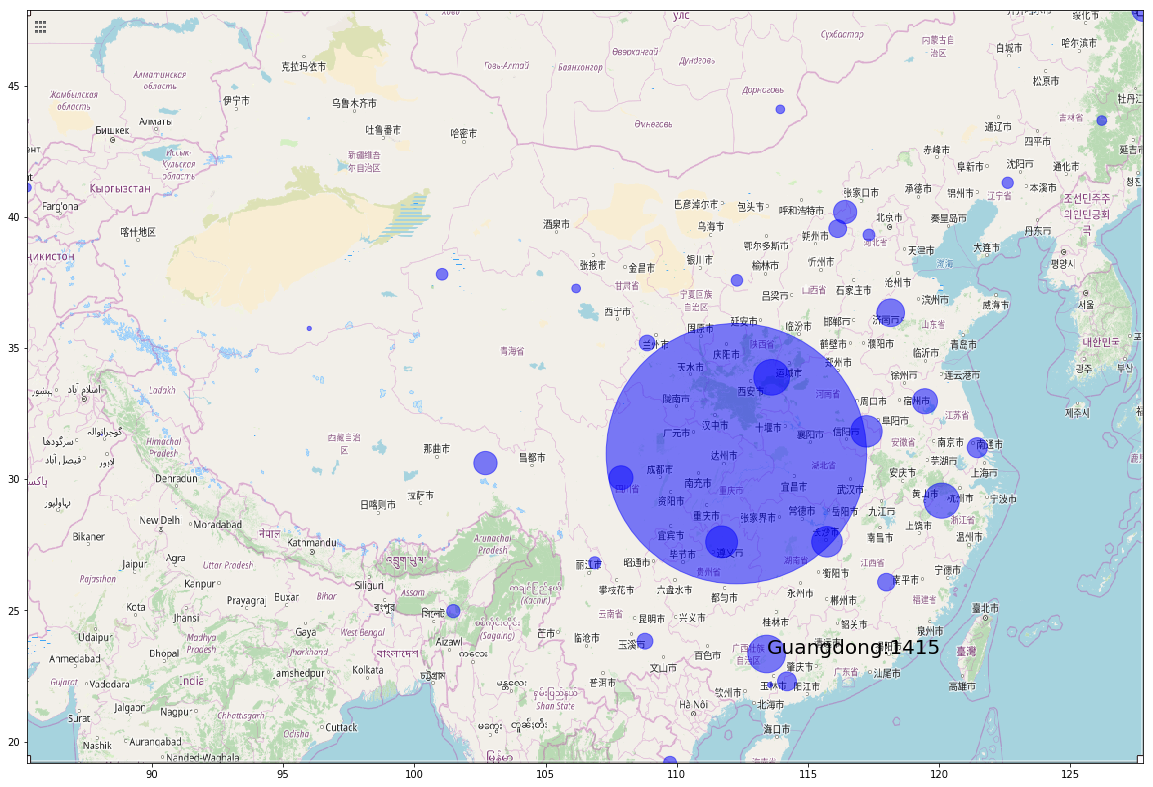

In [335]:
quick_map('3/23/20', CITY = 'Guangdong')

Investigation ends here.